# <center> 7_TransferLearning 

# 预训练

## 导入必要的库

In [1]:
%%time
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

CPU times: user 229 ms, sys: 22.9 ms, total: 252 ms
Wall time: 256 ms


## 生成数据集

CPU times: user 50.4 ms, sys: 3.05 ms, total: 53.5 ms
Wall time: 56.5 ms


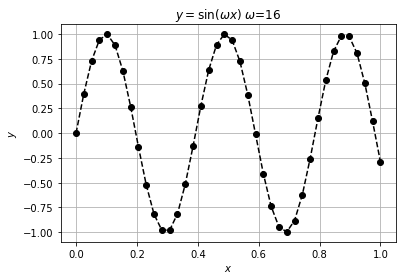

In [2]:
%%time
sample_num=40
p=16

XX=np.linspace(0,1,sample_num)
yy=np.sin(p*XX)
plt.plot(XX,yy,'k--o')
plt.xlabel(r"$x$")
plt.ylabel(r"$y$")
plt.title(r"$y=\sin(\omega x)$"+" "+r"$\omega$"+"="+str(p))
plt.grid(True)
XX=XX.reshape(sample_num,1)
yy=yy.reshape(sample_num,1)


## 定义ANN算法

In [3]:
%%time
'''此栏中的ann算法适合于2及以上隐层，
而ANN算法适用于1~n个隐层'''

'''ANN(input_object,target,n_iter,alpha,hidden_layer_num,hidden_layer_dimension)
ANN(坐标变量、y值，训练次数，学习率，隐藏层数，隐藏层宽度)'''

#定义sigmod函数
def sigmod(x):
    return 1/(1+np.exp(-x))

#先定义适合两个及以上隐藏层的ann算法
#ann(input_object,target,n_iter,alpha,hidden_layer_num,hidden_layer_dimension)
#ann(坐标变量、y值，训练次数，学习率，隐藏层数，隐藏层宽度)
def ann(input_object,target,n_iter,alpha,hidden_layer_num,hidden_layer_dimension):
    input_length=input_object.shape[0] #输入变量的行数
    input_width=input_object.shape[1] #输入变量的列数
    output_dimension=1 #输出层的数量
    X=input_object   
    y=target.reshape(-1,1)
    #定义第一个omega和最后一个omega
    Omega_input_to_hidlay=np.random.randn(input_width+1,hidden_layer_dimension)
    Omega_hidlay_to_out=np.random.randn(hidden_layer_dimension+1,output_dimension)
    
    n=hidden_layer_num  #隐藏层的数量
    m=hidden_layer_dimension #1个隐藏层的宽度
    #定义每两个隐藏层之间的omega
    Omega_between_hidlay=np.zeros((n-1,m+1,m))
    for i in range(n-1):
        Omega_between_hidlay[i]=np.random.randn(m+1,m)
    
    #设置绘图用的损失函数J，横坐标Jx，以及记录训练精度
    J=np.empty(n_iter)
    Jx=np.empty(n_iter)
    Accuracy=np.empty(n_iter)
    #开始训练
    for i in range(n_iter):
        #先计算a1与a11
        a1=X
        a11=np.insert(a1,0,values=1,axis=1)
        
        #定义ax及ax1
        hidden_layer_a=np.zeros((n,input_length,m))
        hidden_layer_a1=np.zeros((n,input_length,m+1))
        
        #定义Z2,3,...,n+1
        Z_of_hidlay=np.zeros((n,input_length,m))
        
        #计算Z2
        Z_of_hidlay[0]=np.dot(a11,Omega_input_to_hidlay)
        
        #计算a2及a21
        hidden_layer_a[0]=sigmod(Z_of_hidlay[0])
        hidden_layer_a1[0]=np.insert(hidden_layer_a[0],0,values=1,axis=1)
        
        #计算ax,ax1,Zx
        for j in range(1,n,1):
            Z_of_hidlay[j]=np.dot(hidden_layer_a1[j-1],Omega_between_hidlay[j-1])
            hidden_layer_a[j]=sigmod(Z_of_hidlay[j])
            hidden_layer_a1[j]=np.insert(hidden_layer_a[j],0,values=1,axis=1)
        
        #获得特征函数
        a_feature=hidden_layer_a[n-1]
        
        #计算输出层的Z与a
        Z_last=np.dot(hidden_layer_a1[n-1], Omega_hidlay_to_out)
        a_out=Z_last #最后一层的输出
        
        #计算cost function
        J[i]=np.dot((a_out-y).T,(a_out-y))/2/input_length
        Jx[i]=i
        
        #反向传播
        delta_last=a_out-y
        d_Omega_hidlay_to_out=np.dot(hidden_layer_a1[n-1].T,delta_last)
        
        delta_between_hidlay=np.zeros((n-1,input_length,m))
        delta_between_hidlay[n-2]=np.dot(delta_last,Omega_hidlay_to_out[1:,:].T)*(hidden_layer_a[n-1]*(1-hidden_layer_a[n-1]))
        d_Omega_between_hidlay=np.zeros((n-1,m+1,m))
        
        d_Omega_between_hidlay[n-2]=np.dot(hidden_layer_a1[n-2].T,delta_between_hidlay[n-2])
        
        for k in range(n-3,-1,-1):
            delta_between_hidlay[k]=np.dot(delta_between_hidlay[k+1],(Omega_between_hidlay[k+1])[1:,:].T)*(hidden_layer_a[k+1]*(1-hidden_layer_a[k+1]))
            d_Omega_between_hidlay[k]=np.dot(hidden_layer_a1[k].T, delta_between_hidlay[k])
            
        delta_first=np.dot(delta_between_hidlay[0],(Omega_between_hidlay[0])[1:,:].T)*(hidden_layer_a[0]*(1-hidden_layer_a[0]))
        d_Omega_input_to_hidlay=np.dot(a11.T,delta_first)
        
        #权重更新
        Omega_input_to_hidlay=Omega_input_to_hidlay-alpha*d_Omega_input_to_hidlay/input_length
        
        Omega_hidlay_to_out=Omega_hidlay_to_out-alpha*d_Omega_hidlay_to_out/input_length
        
        for q in range(n-1):
            Omega_between_hidlay[q]=Omega_between_hidlay[q]-alpha*d_Omega_between_hidlay[q]/input_length
    #返回值
    return Jx,J,a_out,a_feature

#定义适合1、2、3、......个隐藏层的ANN算法
#ANN(input_object,target,n_iter,alpha,hidden_layer_num,hidden_layer_dimension)
#ANN(坐标变量、y值，训练次数，学习率，隐藏层数，隐藏层宽度)
def ANN(input_object,target,n_iter,alpha,hidden_layer_num,hidden_layer_dimension):
    if hidden_layer_num==1:
        n_iter=n_iter
        alpha=alpha
        m=input_object.shape[0]
        input_dimension=input_object.shape[1]
        hidden_layer_1_dimension=hidden_layer_dimension
        output_dimension=1
        X=input_object
        y=target.reshape(-1,1)
        Omega1=np.random.randn(input_dimension+1,hidden_layer_1_dimension)
        Omega2=np.random.randn(hidden_layer_1_dimension+1,output_dimension)
        J_ann=np.empty(n_iter)
        Jx_ann=np.empty(n_iter)
        Accuracy_ann=np.empty(n_iter)
        #开始训练
        for i in np.arange(n_iter):
            #定义矩阵
            a1=X
            a11=np.insert(a1,0,values=1,axis=1)
            Z2=np.dot(a11,Omega1)
            a2=sigmod(Z2)
            a21=np.insert(a2,0,values=1,axis=1)
            Z3=np.dot(a21,Omega2)
            a3=Z3
            a_out_ann=a3
            #获得特征函数
            a_feature_ann=a2
            #计算cost function
            J_ann[i]=np.dot((a3-y).T,(a3-y))/2/m
            Jx_ann[i]=i
            #反向传播 Backpropagation
            delta3=a3-y
            d_Omega2=np.dot(a21.T,delta3)
            delta2=np.dot(delta3,Omega2[1:,:].T)*(a2*(1-a2))
            d_Omega1=np.dot(a11.T,delta2)
            #update weights
            Omega1=Omega1-alpha*d_Omega1/m
            Omega2=Omega2-alpha*d_Omega2/m
    else:
        Jx_ann,J_ann,a_out_ann,a_feature_ann=ann(input_object,target,n_iter,alpha,hidden_layer_num,hidden_layer_dimension)
    
    return Jx_ann,J_ann,a_out_ann,a_feature_ann
            


CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 7.87 µs


## 进行训练

此处我们训练含有1个、2个、3个隐含层的模型，我们统一取隐含层的宽度呀为20，学习次数为50000次，学习率为0.2

In [4]:
#ANN(input_object,target,n_iter,alpha,hidden_layer_num,hidden_layer_dimension)
#ANN(坐标变量、y值，训练次数，学习率，隐藏层数，隐藏层宽度)
Jx_1,J_1,a_out_1,a_feature_1=ANN(XX,yy,50000,0.2,1,20)
Jx_2,J_2,a_out_2,a_feature_2=ANN(XX,yy,50000,0.2,2,20)
Jx_3,J_3,a_out_3,a_feature_3=ANN(XX,yy,50000,0.2,3,20)


## 画出训练损失函数及拟合情况

CPU times: user 72.4 ms, sys: 5.98 ms, total: 78.4 ms
Wall time: 78.9 ms


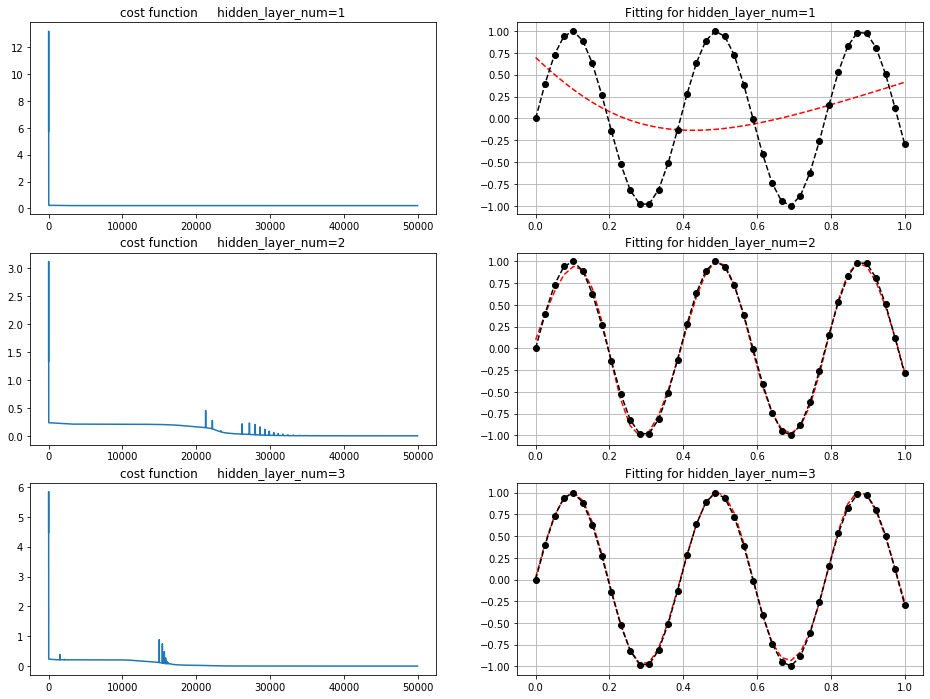

In [5]:
%%time
plt.figure(figsize=(16,12))

plt.subplot(321)
plt.plot(Jx_1,J_1)
plt.title("cost function"+"     "+"hidden_layer_num=1")

plt.subplot(322)
plt.title("Fitting for hidden_layer_num=1")
plt.plot(XX,a_out_1,'r--')
plt.plot(XX,yy,'k--o')
plt.grid(True)

plt.subplot(323)
plt.plot(Jx_2,J_2)
plt.title("cost function"+"     "+"hidden_layer_num=2")

plt.subplot(324)
plt.title("Fitting for hidden_layer_num=2")
plt.plot(XX,a_out_2,'r--')
plt.plot(XX,yy,'k--o')
plt.grid(True)

plt.subplot(325)
plt.plot(Jx_3,J_3)
plt.title("cost function"+"     "+"hidden_layer_num=3")

plt.subplot(326)
plt.title("Fitting for hidden_layer_num=3")
plt.plot(XX,a_out_3,'r--')
plt.plot(XX,yy,'k--o')
plt.grid(True)


## 画出三种情况的特征函数

### 隐含层为1的特征函数

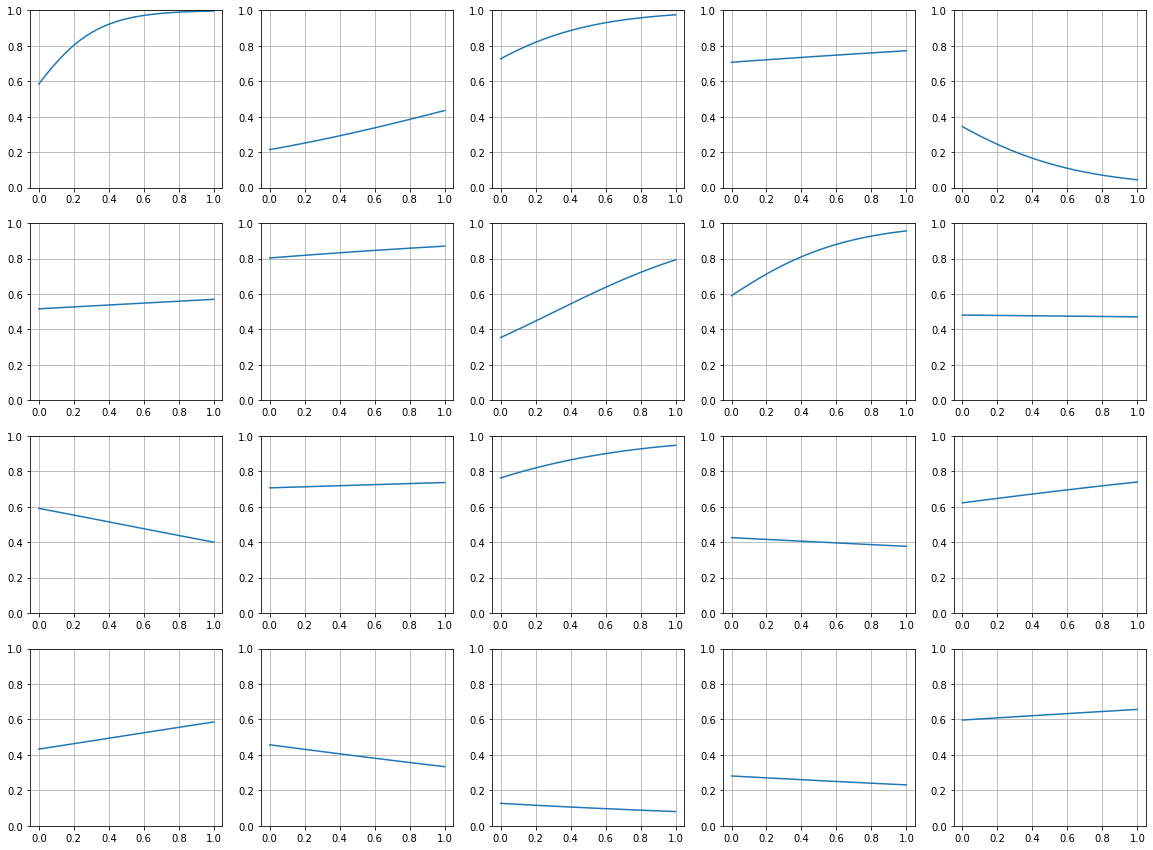

In [6]:
x_1=np.linspace(0,1,40).reshape(-1,1)
y_1=a_feature_1
hidden_layer_dimension=20
hld=hidden_layer_dimension
plt.figure(figsize=(20,15))
for i in np.arange(hld):
    plt.subplot(4,hld/4,i+1)
    plt.plot(x_1,y_1[:,i])
    plt.ylim(0,1)
    plt.grid(True)

### 隐含层为2的特征函数

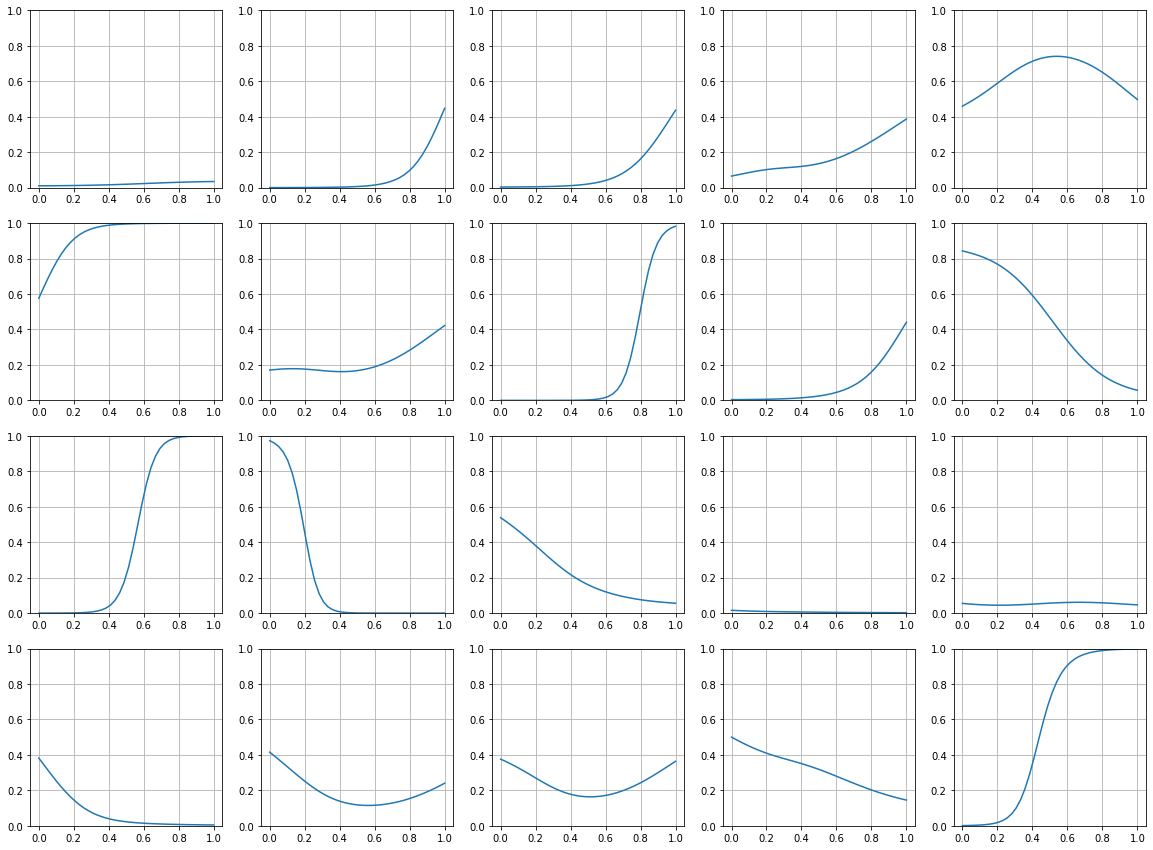

In [7]:
x_2=np.linspace(0,1,40).reshape(-1,1)
y_2=a_feature_2
hidden_layer_dimension=20
hld=hidden_layer_dimension
plt.figure(figsize=(20,15))
for i in np.arange(0,hld,1):
    plt.subplot(4,hld/4,i+1)
    plt.plot(x_2,y_2[:,i])
    plt.ylim(0,1)
    plt.grid(True)

### 隐含层为3的特征函数

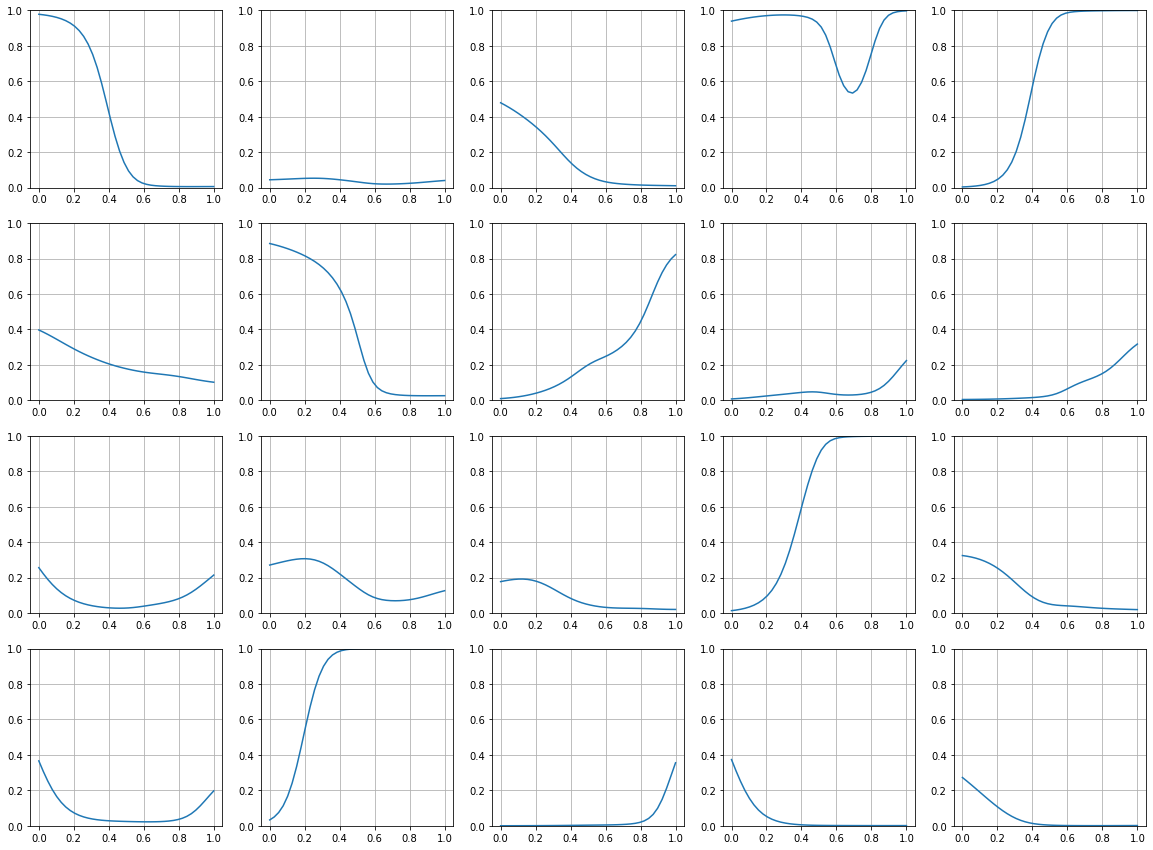

In [8]:
x_3=np.linspace(0,1,40).reshape(-1,1)
y_3=a_feature_3
hidden_layer_dimension=20
hld=hidden_layer_dimension
plt.figure(figsize=(20,15))
for i in np.arange(hld):
    plt.subplot(4,hld/4,i+1)
    plt.plot(x_3,y_3[:,i])
    plt.ylim(0,1)
    plt.grid(True)

### 简单结论

由上面三部分，我们可以发现，随着隐含层的增加，特征函数的非线性也在增加，对于目标函数的拟合也越来越好。

===============================================================================================================

# 迁移学习

## 导入必要的库

In [9]:
%%time
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

CPU times: user 737 µs, sys: 0 ns, total: 737 µs
Wall time: 753 µs


## 样本数m相同，sin的系数p不同的情况

### 生成数据集

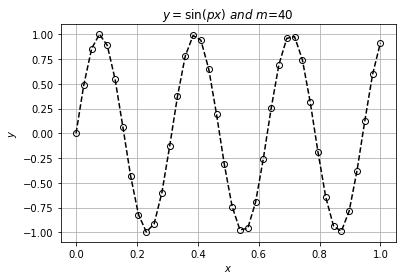

In [10]:
def Testing_Set(m,p):
    x=np.linspace(0,1,m).reshape(m,1)
    np.random.seed(42)
    y=trueFunction(x,p)
    return x,y

def trueFunction(x,p):
    return np.sin(p*x)

#训练集
m_test=40 #训练样本数
p=20 #训练集p值
x_test_m,y_test_m=Testing_Set(m_test,p)

#画图
plt.plot(x_test_m,y_test_m,'k--o',markerfacecolor='none',label='testing set');
plt.xlabel(r'$x$');
plt.ylabel(r'$y$');
plt.title(r'$y=\sin(px)$'+" "+"$and$"+" "+r"$m$"+"="+str(m_test))
plt.grid(True)

### 定义相关函数

In [13]:

def FeatureMapping(n):
    if n==1:
        a=np.insert(a_feature_1,0,values=1,axis=1)
    elif n==2:
        a=np.insert(a_feature_2,0,values=1,axis=1)
    else:
         a=np.insert(a_feature_3,0,values=1,axis=1)
    return a

def NormalEquation(x,y,n):
    '''
    线性模型的 Normal Equation
    '''
    X=FeatureMapping(n)
    C=np.dot(X.T,X)
    B=np.linalg.pinv(C) #伪逆 pinv(pseudoinverse) 求逆 inv
    D=np.dot(B, X.T)
    return np.dot(D,y)

def prediction(x,Theta):
    '''
    假设函数
    shape=X.shape[0] 样本数
    '''
    n=Theta.shape[0]
    X=FeatureMapping(n)
    return np.dot(X,Theta)

def MSE(Y,Y_prediction):
    '''
    计算平均平方误差
    Mean Square Error
    '''
    n=Y.shape[0]
    YY=Y_prediction-Y
    Loss=np.dot(YY.T, YY)/n
    error=Loss.item()
    return error

### 进行测试

In [14]:
#测试
#1个隐含层
Theta_test_Norm_m1=NormalEquation(x_test_m,y_test_m,1)
y_prediction_test_Norm_m1=prediction(x_test_m,Theta_test_Norm_m1)
MSE_test_Norm_m1=MSE(y_test_m,y_prediction_test_Norm_m1)
#2个隐含层
Theta_test_Norm_m2=NormalEquation(x_test_m,y_test_m,2)
y_prediction_test_Norm_m2=prediction(x_test_m,Theta_test_Norm_m2)
MSE_test_Norm_m2=MSE(y_test_m,y_prediction_test_Norm_m2)
#3个隐含层
Theta_test_Norm_m3=NormalEquation(x_test_m,y_test_m,3)
y_prediction_test_Norm_m3=prediction(x_test_m,Theta_test_Norm_m3)
MSE_test_Norm_m3=MSE(y_test_m,y_prediction_test_Norm_m3)


### 输出测试结果

test mse_m1: 469120013274.630737
test mse_m2: 115099861.413584
test mse_m3: 0.000001


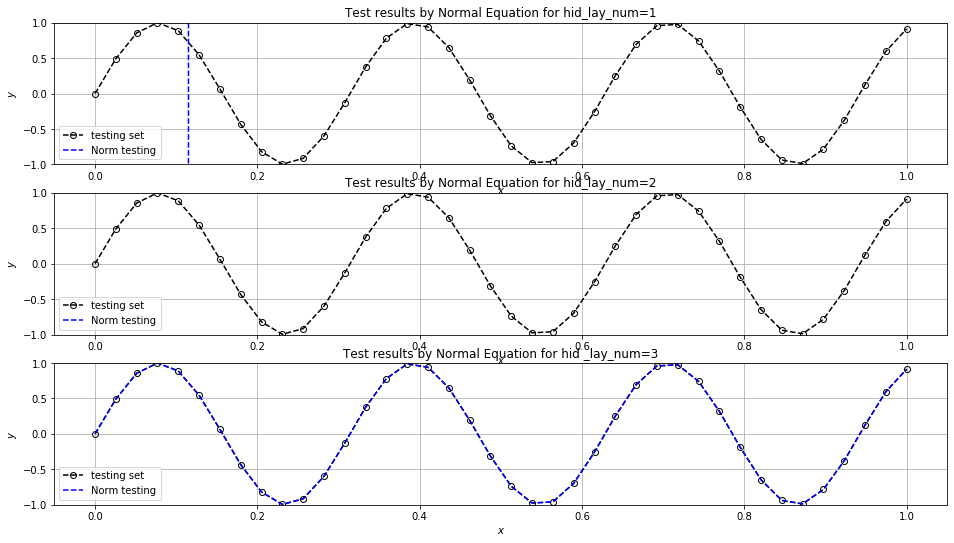

In [15]:
print("test mse_m1:",'{:.6f}'.format(MSE_test_Norm_m1))
print("test mse_m2:",'{:.6f}'.format(MSE_test_Norm_m2))
print("test mse_m3:",'{:.6f}'.format(MSE_test_Norm_m3))
#print("test mse_m4:",'{:.6f}'.format(MSE_test_Norm_m4))

plt.figure(figsize=(16,12))

#1个隐含层的拟合情况
plt.subplot(411)
plt.plot(x_test_m,y_test_m,'k--o',markerfacecolor='none',label='testing set');
plt.plot(x_test_m,y_prediction_test_Norm_m1,'b--',label='Norm testing');
plt.xlabel(r'$x$');
plt.ylabel(r'$y$');
plt.ylim(-1,1)
plt.title("Test results by Normal Equation for hid_lay_num=1");
plt.legend(loc='best')
plt.grid(True)

#2个隐含层的拟合情况
plt.subplot(412)
plt.plot(x_test_m,y_test_m,'k--o',markerfacecolor='none',label='testing set');
plt.plot(x_test_m,y_prediction_test_Norm_m2,'b--',label='Norm testing');
plt.xlabel(r'$x$');
plt.ylabel(r'$y$');
plt.ylim(-1,1)
plt.title("Test results by Normal Equation for hid_lay_num=2");
plt.legend(loc='best')
plt.grid(True)

#3个隐含层的拟合情况
plt.subplot(413)
plt.plot(x_test_m,y_test_m,'k--o',markerfacecolor='none',label='testing set');
plt.plot(x_test_m,y_prediction_test_Norm_m3,'b--',label='Norm testing');
plt.xlabel(r'$x$');
plt.ylabel(r'$y$');
plt.ylim(-1,1)
plt.title("Test results by Normal Equation for hid _lay_num=3");
plt.legend(loc='best')
plt.grid(True)



### 简要结论

可见当隐含层数为1和2时，偏差巨大，而隐含层为3则可以很好拟合新的函数。

## sin的系数p相同，样本数m不同的情况

# 疑问：暂不知如何实现，会报错

- 对预学习得出的特征函数是适合40个样本的特征函数，将其直接应用于不同样本数的数据集中，会因为数目不匹配而报错。

- 对于 `在这里，只要用上面得到的特征函数，取代线性回归中的 Feature Mapping 这一步即可。`有疑惑。


### 生成数据集

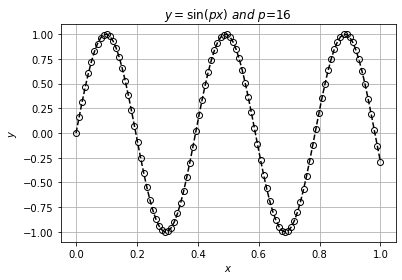

In [16]:
def Testing_Set(m,p):
    x=np.linspace(0,1,m).reshape(m,1)
    np.random.seed(42)
    y=trueFunction(x,p)
    return x,y

def trueFunction(x,p):
    return np.sin(p*x)

#训练集
m_test=100 #训练样本数
p=16 #训练集p值
x_test_p,y_test_p=Testing_Set(m_test,p)

#画图
plt.plot(x_test_p,y_test_p,'k--o',markerfacecolor='none',label='testing set');
plt.xlabel(r'$x$');
plt.ylabel(r'$y$');
plt.title(r'$y=\sin(px)$'+" "+"$and$"+" "+r"$p$"+"="+str(p))
plt.grid(True)

### 进行测试

In [20]:
#测试
#1个隐含层
Theta_test_Norm_p1=NormalEquation(x_test_p,y_test_p,1)
y_prediction_test_Norm_p1=prediction(x_test_p,Theta_test_Norm_p1)
MSE_test_Norm_p1=MSE(y_test_p,y_prediction_test_Norm_p1)
#2个隐含层
Theta_test_Norm_p2=NormalEquation(x_test_p,y_test_p,2)
y_prediction_test_Norm_p2=prediction(x_test_p,Theta_test_Norm_p2)
MSE_test_Norm_p2=MSE(y_test_p,y_prediction_test_Norm_p2)
#3个隐含层
Theta_test_Norm_p3=NormalEquation(x_test_p,y_test_p,3)
y_prediction_test_Norm_p3=prediction(x_test_p,Theta_test_Norm_p3)
MSE_test_Norm_p3=MSE(y_test_p,y_prediction_test_Norm_p3)

ValueError: shapes (21,40) and (100,1) not aligned: 40 (dim 1) != 100 (dim 0)

### 输出测试结果

In [21]:
print("test mse_p1:",'{:.6f}'.format(MSE_test_Norm_p1))
print("test mse_p2:",'{:.6f}'.format(MSE_test_Norm_p2))
print("test mse_p3:",'{:.6f}'.format(MSE_test_Norm_p3))




plt.figure(figsize=(16,12))

#1个隐含层的拟合情况
plt.subplot(311)
plt.plot(x_test_p,y_test_p,'k--o',markerfacecolor='none',label='testing set');
plt.plot(x_test_p,y_prediction_test_Norm_p1,'b--',label='Norm testing');
plt.xlabel(r'$x$');
plt.ylabel(r'$y$');
plt.ylim(-1,1)
plt.title("Test results by Normal Equation for hid_lay_num=1");
plt.legend(loc='best')
plt.grid(True)

#2个隐含层的拟合情况
plt.subplot(312)
plt.plot(x_test_p,y_test_p,'k--o',markerfacecolor='none',label='testing set');
plt.plot(x_test_p,y_prediction_test_Norm_p2,'b--',label='Norm testing');
plt.xlabel(r'$x$');
plt.ylabel(r'$y$');
plt.ylim(-1,1)
plt.title("Test results by Normal Equation for hid_lay_num=2");
plt.legend(loc='best')
plt.grid(True)

#3个隐含层的拟合情况
plt.subplot(313)
plt.plot(x_test_p,y_test_p,'k--o',markerfacecolor='none',label='testing set');
plt.plot(x_test_p,y_prediction_test_Norm_p3,'b--',label='Norm testing');
plt.xlabel(r'$x$');
plt.ylabel(r'$y$');
plt.ylim(-1,1)
plt.title("Test results by Normal Equation for hid _lay_num=3");
plt.legend(loc='best')
plt.grid(True)

NameError: name 'MSE_test_Norm_p1' is not defined

### 简要结论

可见当隐含层数为1和2时，偏差巨大，而隐含层为3则可以很好拟合新的函数。

# 总结

- 我们发现，越深的网络迁移学习的效果更好，在只有1个和2个隐含层的迁移学习中，我们可以见到，误差是非常大的，而隐含层数量一旦达到3个，精度迅速提高。


- 此外，对比线性回归的平均平方误差为0.004075，神经网络的迁移学习在隐含层达到3层的平均平方误差为0.000001。可见当神经网络的深度增加时，神经网络的迁移学习具有优势。